In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial import distance
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.spatial.distance import pdist
from numpy.linalg import norm 

# import n-by-2 matrix as csv file

In [2]:
data = pd.read_csv("matrixnby2.csv")

In [3]:
matrix = np.array(data)

# Kmeans to identify clusters and plot 

In [4]:
#kmeans to identify clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(matrix)
y_kmeans = kmeans.predict(matrix)

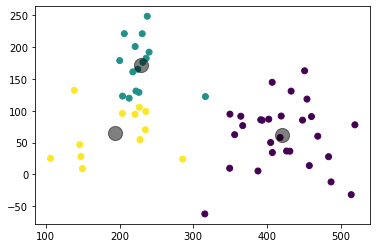

In [5]:
#plot clusters and cluster centers
plt.scatter(matrix[:, 0], matrix[:, 1], c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [6]:
centers

array([[420.16619534,  61.14760682],
       [228.55623072, 171.48278094],
       [193.65413298,  65.39694807]])

# MST

In [7]:
distances_edges = pdist(centers, 'euclidean')
distances_edges

array([221.10682755, 226.55191744, 111.67972225])

In [8]:
#generate matrix of nodes and edges 
edge_matrix = np.zeros((len(centers), len(centers)))

for i in range(len(centers)-1):
    for j in range(i+1, len(centers)):
        edge_matrix[i][j] = distance.euclidean(centers[i],centers[j])
        
print(edge_matrix)



[[  0.         221.10682755 226.55191744]
 [  0.           0.         111.67972225]
 [  0.           0.           0.        ]]


In [9]:
matrix_mst = csr_matrix(edge_matrix + edge_matrix.T) #generate adjacency matrix for MST
MST = minimum_spanning_tree(matrix_mst)
MST.toarray().astype(int) #MST matrix

array([[  0, 221,   0],
       [  0,   0, 111],
       [  0,   0,   0]])

In [10]:
#find x and y for plotting the edges
x = []
y = []
for i in range(len(centers)):
    for j in range(i+1, len(centers)):
        x_points = (centers[i][0], centers[j][0])
        y_points = (centers[i][1], centers[j][1])
        x.append(x_points)
        y.append(y_points)
print(x,y)

[(420.1661953448468, 228.5562307183207), (420.1661953448468, 193.6541329799528), (228.5562307183207, 193.6541329799528)] [(61.14760681999695, 171.48278093609517), (61.14760681999695, 65.39694806682456), (171.48278093609517, 65.39694806682456)]


In [11]:
#looking for non-zero elements of the MST matrix
MST.nonzero()

(array([0, 1], dtype=int32), array([1, 2], dtype=int32))

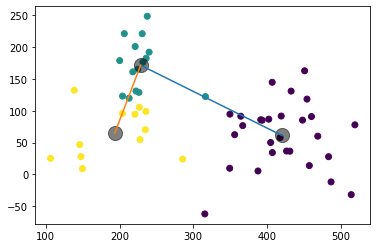

In [12]:
plt.scatter(matrix[:, 0], matrix[:, 1], c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

#deciding edges according to the MST matrix
plt.plot(x[0], y[0])
plt.plot(x[2], y[2])

plt.show()

# Projection

In [13]:
#find the labels to identify cells in different clusters
labels = kmeans.labels_
labels

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2,
       1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [14]:
#find the position of each cell
c1_points_position = list(np.where(labels == 0)[0])
c2_points_position = list(np.where(labels == 1)[0])
c3_points_position = list(np.where(labels == 2)[0])

#find the edges that connect two cluster centers
v12 = centers[0].reshape(-1,1)-centers[1].reshape(-1,1)
v23 = centers[1].reshape(-1,1)-centers[2].reshape(-1,1)

In [15]:
#projection for cluster 1
project_value_list1 = []
for ele in c1_points_position:
    x1 = matrix[ele].reshape(-1,1)  - centers[0].reshape(-1,1)
    project_value1 = (x1.T@(v12))/(v12.T@v12)
    project_value_list1.append(project_value1)
print(project_value_list1)

[array([[0.00395431]]), array([[0.00960116]]), array([[-0.35212579]]), array([[0.08973641]]), array([[0.19268215]]), array([[-0.07294123]]), array([[-0.10863541]]), array([[-0.28700199]]), array([[0.32297039]]), array([[0.09769786]]), array([[-0.03526459]]), array([[-0.12802909]]), array([[0.07974798]]), array([[-0.13189416]]), array([[0.25218505]]), array([[-0.0026714]]), array([[-0.10894625]]), array([[0.42546877]]), array([[-0.16829604]]), array([[-0.24055951]]), array([[-0.16163172]]), array([[-0.00159383]]), array([[-0.25419463]]), array([[0.05486897]]), array([[0.57781553]]), array([[-0.24350048]]), array([[-0.15923228]]), array([[0.34978982]])]


In [16]:
#projection for cluster 3
project_value_list3 = []
for ele in c3_points_position:
    x3 = matrix[ele].reshape(-1,1) - centers[2].reshape(-1,1)
    project_value3 = (x3.T@(v23))/(v23.T@v23)
    project_value_list3.append(project_value3)
print(project_value_list3)

[array([[-0.29128752]]), array([[0.41399976]]), array([[-0.44663936]]), array([[-0.58605259]]), array([[-0.60265963]]), array([[0.15557242]]), array([[0.32382014]]), array([[0.40291662]]), array([[0.43398872]]), array([[0.00398902]]), array([[0.28705854]]), array([[-0.09470611]])]


In [17]:
#projection for cluster 2
project_value_list21 = []
project_value_list23 = []
for ele in c2_points_position:
    d1 = np.linalg.norm(matrix[ele] - centers[0])
    d2 = np.linalg.norm(matrix[ele] - centers[2])
    x2 = matrix[ele].reshape(-1,1) - centers[1].reshape(-1,1)
    if d1 < d2:
        project_value21 = (x2.T@(v12))/(v12.T@v12)
        project_value_list21.append(project_value21)
    else:
        project_value23 = (x2.T@(v23))/(v23.T@v23)
        project_value_list23.append(project_value23)


In [18]:
#find the cell order
cell_order_c1 = np.argsort(np.array(project_value_list1).reshape(1, -1))
cell_order_c1

array([[ 2,  7, 22, 25, 19, 18, 20, 26, 13, 11, 16,  6,  5, 10, 15, 21,
         0,  1, 23, 12,  3,  9,  4, 14,  8, 27, 17, 24]])

In [19]:
cell_order_c21 = np.argsort(np.array(project_value_list21).reshape(1, -1))
cell_order_c2_combine21 = cell_order_c21[0]+max(cell_order_c1[0])
cell_order_c2_combine21

array([27])

In [20]:
cell_order_c23 = np.argsort(np.array(project_value_list23).reshape(1, -1))
cell_order_c2_combine23 = cell_order_c23[0]+max(cell_order_c2_combine21)
cell_order_c2_combine23

array([34, 40, 39, 27, 37, 33, 32, 35, 38, 28, 29, 36, 30, 31])

In [21]:
cell_order_c3 = np.argsort(np.array(project_value_list3).reshape(1, -1))
cell_order_c3_combine = cell_order_c3[0]+max(cell_order_c2_combine23)
cell_order_c3_combine

array([44, 43, 42, 40, 51, 49, 45, 50, 46, 47, 41, 48])

In [22]:
c1 = [matrix[item] for item in c1_points_position]
c2 = [matrix[item] for item in c2_points_position]
c3 = [matrix[item] for item in c3_points_position]

In [23]:
pt_x = np.hstack(( cell_order_c1[0],cell_order_c2_combine21,cell_order_c2_combine23,cell_order_c3_combine )).ravel()
pt_y = c1+ c2+ c3

In [24]:
y_values = np.array(pt_y).reshape(1,-1)
y_values

array([[454.09535588, 118.31746453, 407.1690976 ,  34.3224615 ,
        349.63998206,  94.69340057, 460.19787043,  90.90614523,
        468.70395971,  60.06391076, 419.13761514,  91.68076475,
        432.57799523, 130.83723674, 364.35838038,  91.39803021,
        483.37733946,  27.81675663, 430.87951129,  36.46375173,
        404.8286722 ,  50.13752704, 402.26137345,  86.78198151,
        426.44557557,  36.71708493, 315.57759643, -62.04199185,
        457.27211557,  13.84613369, 417.62891523,  57.92499001,
        450.89338067, 162.78177774, 486.73281572, -11.77190631,
        391.41503044,  85.78785264, 406.90982895, 144.71548791,
        349.29104557,   9.68173051, 387.66562229,   5.41276113,
        356.05736479,  62.44578484, 448.0659329 ,  85.28697066,
        514.07330937, -31.79500458, 366.96213684,  76.64474558,
        393.37185798,  85.17006387, 519.0637885 ,  77.907079  ,
        222.23515236, 130.98192413, 240.03841112, 192.0601727 ,
        221.14924462, 200.88775243, 230.

In [25]:
ordered_x = []
ordered_y = []
for i in range(len(pt_y)):
    o_x = pt_y[i][0]
    o_y = pt_y[i][1]
    ordered_x.append(o_x)
    ordered_y.append(o_y)
print(ordered_x,ordered_y)

[454.0953558849136, 407.1690975988548, 349.6399820639059, 460.1978704287384, 468.7039597089194, 419.1376151425485, 432.57799523268017, 364.3583803823681, 483.3773394591933, 430.8795112855517, 404.82867219751785, 402.2613734480569, 426.4455755748765, 315.5775964275779, 457.27211556664525, 417.6289152329975, 450.893380673764, 486.732815722118, 391.41503043861024, 406.90982894532107, 349.2910455683775, 387.6656222851868, 356.05736478864367, 448.06593290326407, 514.0733093741366, 366.9621368436939, 393.3718579795952, 519.0637884976541, 222.2351523619629, 240.0384111223048, 221.1492446243644, 230.70463860659805, 237.54873967047936, 200.185785954486, 224.71294772969927, 212.9746605552941, 231.6307330391538, 206.42074521306688, 217.9297119490128, 236.057953727036, 226.25903176026824, 204.0646510454136, 316.43105341567014, 146.05921911460712, 138.61457883077284, 147.67426020843277, 106.42558152510176, 149.69746295734984, 234.90411284662792, 220.94576689375293, 235.6657033667078, 226.7185331842

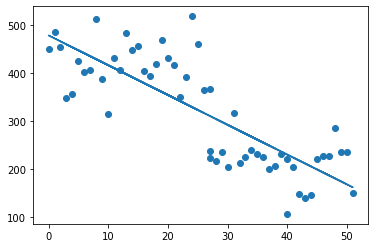

In [26]:
#plot the pseudotime by x
plt.scatter(pt_x, ordered_x)
mx,bx = np.polyfit(pt_x, ordered_x, 1)
plt.plot(pt_x, mx*pt_x+bx)

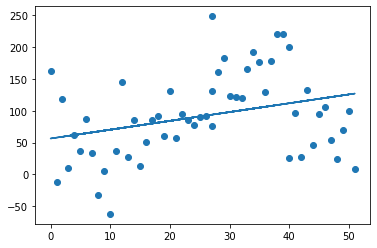

In [27]:
#plot the pseudotime by y
plt.scatter(pt_x, ordered_y)
my,by = np.polyfit(pt_x, ordered_y, 1)
plt.plot(pt_x, my*pt_x+by)

In [28]:
vector12 = centers[0]-centers[1]
vector23 = centers[1]-centers[2]

In [29]:
points1 = []
for ele in project_value_list1:
    loc1 = centers[0]+ele*vector12
    points1.append(loc1)
print(points1)

x0 = []
y0 = []
for i in range(len(points1)):
    px0 = points1[i][0][0]
    py0 = points1[i][0][1]
    x0.append(px0)
    y0.append(py0)
print(x0,y0)

[array([[420.92387989,  60.71130772]]), array([[422.005873  ,  60.08826132]]), array([[352.69538557,  99.99946695]]), array([[437.36058628,  51.24652406]]), array([[457.08601527,  39.88798826]]), array([[406.18992907,  69.19559   ]]), array([[399.35056792,  73.1339139 ]]), array([[365.17375373,  92.81402162]]), array([[482.05053956,  25.51261306]]), array([[438.8860795 ,  50.36809605]]), array([[413.40914913,  65.03853114]]), array([[395.63454598,  75.27371874]]), array([[435.4467037 ,  52.34859914]]), array([[394.89396002,  75.70017192]]), array([[468.48736312,  33.32272584]]), array([[419.6543279 ,  61.44235654]]), array([[399.29100898,  73.16820986]]), array([[501.69025215,  14.20343552]]), array([[387.91899657,  79.71657998]]), array([[374.07259556,  87.68978258]]), array([[389.19594741,  78.98127067]]), array([[419.86080075,  61.32346284]]), array([[371.4599708 ,  89.19421586]]), array([[430.67963688,  55.09362939]]), array([[530.8814084 ,  -2.60577017]]), array([[373.509077  ,  8

In [30]:
points21 = []
for ele in project_value_list21:
    loc21 = centers[1]+ele*vector12
    points21.append(loc21)
print(points21)
x21 = []
y21 = []
for i in range(len(points21)):
    px21 = points21[i][0][0]
    py21 = points21[i][0][1]
    x21.append(px21)
    y21.append(py21)
print(x21,y21)

[array([[315.81974466, 121.23364581]])]
[315.8197446557508] [121.23364580872506]


In [31]:
points23 = []
for ele in project_value_list23:
    loc23 = centers[1]+ele*vector23
    points23.append(loc23)
print(points23)
x23 = []
y23 = []
for i in range(len(points23)):
    px23 = points23[i][0][0]
    py23 = points23[i][0][1]
    x23.append(px23)
    y23.append(py23)
print(x23,y23)

[array([[215.91553855, 133.06106866]]), array([[235.78640308, 193.45907768]]), array([[236.56213412, 195.81693231]]), array([[243.465754  , 216.80066432]]), array([[252.28248402, 243.59934428]]), array([[227.96401778, 169.68273434]]), array([[226.30252203, 164.63257482]]), array([[211.67639231, 120.17607354]]), array([[230.25716694, 176.65282077]]), array([[241.12772977, 209.69417891]]), array([[224.42738642, 158.93305143]]), array([[232.55268394, 183.63010432]]), array([[215.69659219, 132.39557553]]), array([[211.78992255, 120.52115164]])]
[215.91553854677394, 235.78640308063208, 236.56213411511476, 243.46575399973406, 252.28248402039733, 227.9640177844383, 226.3025220291444, 211.67639231036063, 230.25716693954973, 241.12772976607482, 224.4273864233848, 232.55268393572803, 215.6965921920243, 211.78992254731324] [133.06106866209487, 193.45907767888374, 195.81693231250858, 216.80066431517255, 243.5993442809717, 169.6827343372398, 164.63257482160276, 120.17607353900317, 176.6528207726471

In [32]:
points3 = []
for ele in project_value_list3:
    loc3 = centers[2]+ele*vector23
    points3.append(loc3)
print(points3)
x3 = []
y3 = []
for i in range(len(points3)):
    px3 = points3[i][0][0]
    py3 = points3[i][0][1]
    x3.append(px3)
    y3.append(py3)
print(x3,y3)

[array([[183.48758753,  34.49546902]]), array([[208.10359294, 109.31645701]]), array([[178.06548221,  18.01483905]]), array([[173.19966806,   3.22507051]]), array([[172.62004762,   1.46329913]]), array([[199.08393691,  81.90097819]]), array([[204.95613507,  99.74967707]]), array([[207.71676818, 108.14069311]]), array([[208.80124983, 111.43700328]]), array([[193.79335816,  65.82012662]]), array([[203.67307827,  95.84979257]]), array([[190.34869098,  55.34997123]])]
[183.48758752537898, 208.10359293550334, 178.0654822135608, 173.199668059121, 172.62004762151778, 199.083936911592, 204.95613507322392, 207.71676817847626, 208.80124983206784, 193.79335816126, 203.67307826645845, 190.34869098127325] [34.495469020018234, 109.31645701400898, 18.014839052702627, 3.2250705112724276, 1.4632991320240123, 81.90097818910456, 99.74967706731853, 108.14069311490783, 111.43700327698255, 65.82012662262554, 95.84979256797877, 55.34997123295064]


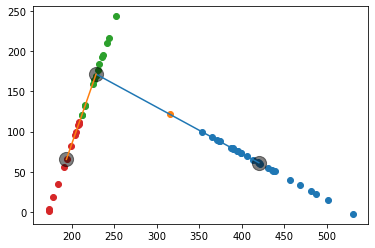

In [33]:
plt.scatter(x0, y0)
plt.scatter(x21, y21)
plt.scatter(x23, y23)
plt.scatter(x3, y3)


centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.plot(x[0], y[0])
plt.plot(x[2], y[2])

plt.show()


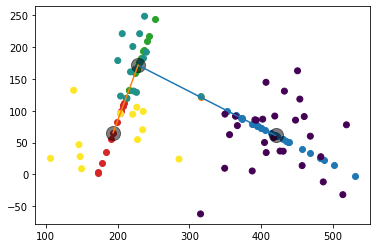

In [34]:
plt.scatter(x0, y0)
plt.scatter(x21, y21)
plt.scatter(x23, y23)
plt.scatter(x3, y3)

plt.scatter(matrix[:, 0], matrix[:, 1], c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.plot(x[0], y[0])
plt.plot(x[2], y[2])

plt.show()

